## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nhanes_loader
import importlib
importlib.reload(nhanes_loader)
import numpy as np
import janitor
from sklearn.linear_model import LinearRegression

janitor allows command to find and replace

## Import Household Adult File

In [ ]:
from nhanes.household_adult_file import HouseholdAdultFile
nh = HouseholdAdultFile()

In [ ]:
nh.cols

## Import Exam File

In [ ]:
import nhanes.exam_file
importlib.reload(nhanes.exam_file)
from nhanes.exam_file import ExamFile

In [ ]:
exam = ExamFile()

In [ ]:
exam.data.shape

In [ ]:
exam.cols

## Import Household Youth File

In [ ]:
import nhanes.household_youth_file
importlib.reload(nhanes.household_youth_file)
from nhanes.household_youth_file import HouseholdYouthFile

In [ ]:
youth = HouseholdYouthFile()

In [ ]:
youth.cols

## Combine adult and exam files - adult_exam

match files on the SEQN field 

In [ ]:
adult_exam = nh.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [ ]:
adult_exam.info()

## Combine youth and exam files - youth_exam

In [ ]:
youth_exam = youth.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [ ]:
youth_exam.info()

In [ ]:
youth_exam.query('HSAGEIR < 18').shape

# Hankinson Exclusion

Ages - have none over 89; 17-89
20,050 patients in adult exam file (age > 0)

Any age  .shape - returns row and column count of a dataset

.describe() - returns statistics about numerical columns

.dtypes - returns the data type of each column

.count() - number of total values in column

.value_counts() - returns object counting counts of unique values

In [ ]:
adult_exam.query('HSAGEIR>0').shape

Any spirometry  H 16484 

20050 adult in exam file
16840  adult did spirometry

## SPPMANEU - # acceptable trials

According to the NHANES documentation, the values for SPPMANEU (number of acceptable trials)

00 150; 01-16 20836. 88 1445 blank 8880

so total spirometry is 150 + 20836 = 20986, but this doesn't match, looking at data base values which has 16840 with SPPMANEU 0 to <88

In [ ]:
adult_exam.SPPMANEU.value_counts()

adult_exam.SPPMANEU.value_counts()

In [ ]:
adult_exam.query('SPPMANEU != 88').shape

In [ ]:
adult_exam.query('SPPMANEU > -1 & SPPMANEU < 88').shape

## total with spirometry 16840
total 2 or more spirometry 16470

## number 2 or more acceptable trials  H 277, 16207  we have 16470 (+263)

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').shape

In [ ]:
adult_exam.query('SPPMANEU > 1 & SPPMANEU < 88').shape

### SPPREPRO = 4 both FVC and FEV1 reproducible; 1 FVC not reproducible; 2 FEV1 no reprod 3 neither FVC or FEV1 reproducible
What closely matches Hankinson is to take subjects with FEV1 reproducible or both FEV1 and FVC reproducible
15286 have 2 or more, both FEV1 and FVC reproducible
16289 have 2 or more, FEV1 reproducible - use that criteria (=4 | =1)

In [ ]:
adult_exam.SPPREPRO.value_counts()

In [ ]:
adult_exam.query('SPPMANEU > 1 & SPPMANEU < 88 & SPPREPRO == 4').shape

In [ ]:
adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)').shape

and age < 90 H 68,16139  we have 84  16386 (+26, +247)

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').shape

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('HSAGEIR < 90').shape)

## and age <90 16386, 16215

# first number is with 2 or more spirometries and = the parameter; 2nd is 2 or more with reproducible FEV1 with not the parameter

adult_exam.query('HSAGEIR >= 90').shape

and race/ethnicity not other  H 636, 15503

adult_exam.query('HSAGEIR > 0').shape

and race/ethnicity not other  H 636  15503  we have 639, 15747 (+3, +244)

In [ ]:
adult_exam.DMARETHN.value_counts()

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN == 4').shape

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').shape)

# and race not other 15747, 15580

and cigarette smoker H 7,667  7,836  We have  7787 7960 (+120  +124)


In [ ]:
adult_exam.HAR1.value_counts()

or statement not work, so need HAR1 = 2

In [ ]:
adult_exam.query('HAR1 == 1' or 'HAR1 == 8').shape

In [ ]:
adult_exam.query('HAR1 == 1 | HAR1 == 8').shape

In [ ]:
adult_exam.query('HAR1 == 2').shape

age<90 & ethnicity not other and not smoker(HAR1==2)

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').shape

# and not smoker('not HAR1==1') 7960, 7851

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1').shape

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1').shape)

HXPG1 how many cigarettes past 5 days. 0, #, or 888 applicable  SO '0 < HXPG1 < 888'
65 smoke cigarettes past 5 days

In [ ]:
adult_exam.query('0 < HXPG1 < 888').shape

include those not smoking cigarettes 5 days

In [ ]:
adult_exam.query('not (0 < HXPG1 < 888)').shape

In [ ]:
adult_exam.query('(HXPG1 ==0) | (HXPG1 == 888)').shape

HXPG2A -pipes

In [ ]:
adult_exam.query('0 < HXPG2A < 88').shape

HXPG2B - cigars

In [ ]:
adult_exam.query('0 < HXPG2B < 88').shape

adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').shape

cigs, pipe, cigars

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('MYPB11 ==1').shape

and cigar or pipe smoker  H 313, 7523  for cigar we have 284, 7676 

cigar HAR23  2 is not cigar

In [ ]:
adult_exam.HAR23.value_counts()

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').query('HAR23 == 2').shape

and pipe smoker with above H 313 7523  We have 326 7634 (+13 +111)

In [ ]:
adult_exam.HAR26.value_counts()

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').shape

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2')
 .query('HAR23 == 2').query('not HAR26 == 1').shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' ).shape)

# and not cigar or pipe smoker 7634, 7531

and smoked cigarettes/cigar/pipes in 5 d prior to exam  H 408 7115  

SPQ4 cough, cold or other acute illness;  SPQ3 smoked, ate in past hour

In [ ]:
adult_exam.HAR1.value_counts()

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').query('SPPQ3 == 2').query('SPPQ4 == 2').query('SPPQ5 == 2').shape

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88')
 .query('HSAGEIR < 90').query('DMARETHN < 4')
 .query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').shape)

# add exclude if smoked in 5 days - only 2 more excluded 7632, 7529

In [ ]:
adult_exam.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88')
 .query('HSAGEIR < 90').query('DMARETHN < 4')
 .query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

In [ ]:
adult_exam.HAC1E.value_counts()

In [ ]:
adult_exam.HAR26.value_counts()

and asthma H  454  6661  query('HAC1E == 2') (which gives different that > 1

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('HAR26 == 2'). query('HAC1E == 2').shape)

# and asthma (7156 , 7060)

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2').shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1').shape)

and chronic bronchitis H  181, 6480  HAC1F == 2

In [ ]:
adult_exam.HAC1F.value_counts()

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').shape)

# and chronic bronchitis (6960, 6868 subjects remaining)

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
. query('not HAC1F == 1').shape)

and emphysema  H 15, 6465  HAC1G == 2


In [ ]:
adult_exam.HAC1G.value_counts()

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').shape

# and emphysema (6943, 6852 remaining)

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2').shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
  .query('not HAC1G == 1').shape)

## When add cancer excludes many, but Hankinson none (when lung cancer), so exclude this future analyses

In [ ]:
adult_exam.HAC1O.value_counts()

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAC1O == 2').shape

and wheezing 6 month  H 419 6046  HAL6

In [ ]:
adult_exam.HAL6.value_counts()

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').shape

and whistling or wheezing  H 112 5934  HAL10

In [ ]:
adult_exam.HAL6.value_counts()

# and wheezing 12 months 6493, 6408

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('HAL6 == 2').shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1').shape)

# and wheezing 12 months not=1

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('not HAL6 == 1').shape)

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').shape

# and wheezing apart from colds 6366, 6285

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('HAL6 == 2')
 .query('HAL10 == 2').shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .shape)

In [ ]:
adult_exam.HAL10.value_counts()

and persistent cough H 158, 5776  HAL1

# and not persistent cough 6200, 6121

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').shape

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .shape)

In [ ]:
adult_exam.HAL1.value_counts()

# and not persistent phlegm H 125  5776  HAL 3, 6065,5990

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').query('HAL3 == 2').shape

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .shape)

# and moderate shortness of breath H  848  4803  HAL5  5151 5116

In [ ]:
adult_exam.HAL3.value_counts()

In [ ]:
adult_exam.HAL5.value_counts()

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .shape)

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').query('HAL3 == 2').query('HAL5 == 2').shape

In [ ]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').shape

# and age < 80H  139 4634  HSAGEIR 4944, 4925


adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81').shape

In [ ]:
<82 has 4944; <81 has 4907; HSAITMOR<960 has 4905

In [ ]:
(adult_exam.query('2 <= SPPMANEU < 88')
.query('HSAGEIR < 90').query('DMARETHN < 4')
.query('HAR1 == 2').query('HAR23 > 1')
.query('HAR26 > 1').query('HAC1E > 1')
.query('HAC1F > 1').query('HAC1G > 1')
.query('HAC1O > 1').query('HAL6 > 1')
.query('HAL1 > 1').query('HAL3 > 1')
# .query('HAL5 == 2').query('HSAGEIR < 80').shape)
.query('HAL5 == 2').query('HSAITMOR< 960').shape) 
 

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('HSAITMOR < 960')
 .shape)

and have value for FEV3 - 22

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('HSAITMOR < 960')
 .query('not SPPFEV3 == 88888')
 .shape)

and have value for HSAITMOR - 1 ; one deleted from 4903 to 4902 (with ageIR <81; but change to HSAITMOR<960


In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('HSAITMOR < 960')
 .query('not SPPFEV3 == 88888')
 .shape)

In [ ]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('HSAITMOR<960')
 .query('not SPPFEV3 == 88888')
 .query('not HSAITMOR == 9999')
 .shape)

## Now create DataFrame adult_final of the final rows selected

set AdultFinal = adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81').shape

adult_final = (adult_exam.query('2 <= SPPMANEU < 88')
                         .query('HSAGEIR < 90').query('DMARETHN < 4')
                           .query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1')
                           .query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1')
                           .query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1')
                           .query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81'))

Not use this adult_final = (adult_exam.query('2 <= SPPMANEU < 88')
                         .query('HSAGEIR < 90').query('DMARETHN < 4')
                           .query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1')
                           .query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1')
                           .query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1')
                           .query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81'))

In [ ]:
adult_final = (adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1').query('not HAC1G == 1')
 .query('not HAL6 == 1').query('not HAL10 == 1')
 .query('not HAL1 == 1').query('not HAL3 == 1').query('not HAL5 == 1')
 .query('HSAITMOR < 960') .query('not SPPFEV3 == 88888')
 .query('not HSAITMOR == 9999'))

In [ ]:
af = adult_final

In [ ]:
af.info()

In [ ]:
nh.cols[nh.cols.description.str.contains('age')]

In [ ]:
af.SPPFEV1

## Now do youth exclusion

In [ ]:
youth_exam.shape

13944 youth in exam file
4146  youth did spirometry

In [ ]:
youth_exam.query('(SPPMANEU > -1 & SPPMANEU < 88)').shape

age 8-17

In [ ]:
youth_exam.query('7 < HSAGEIR < 17').shape

In [ ]:
youth_exam.query('HSAGEIR > 0').shape

Youth ethnicity

In [ ]:
youth_exam.query('HSAGEIR > 0').shape

In [ ]:
youth_exam.DMARETHN.value_counts()

spirometry unusable <2 curves

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.shape)

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').shape

ethnicity other

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.shape)

In [ ]:
youth_exam.MYPB1.value_counts()

MYPB1 smoked at least one cigarette - too many so not use
MYPB11 cigarettes smoked in the past 5 days
MYPB3 smoked 100+cigarettes in life
MYPB27A pipes past 5 days
MYPB27B cigars past 5 days

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB1 == 1').shape

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.shape)

smoked 5 days B11 and B27

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').shape

and B27

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.shape)

asthma E1g

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.shape)

chronic bronchitis E1h

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.shape)

wheezing 12 months

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.shape)

wheezing apart from colds

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.shape)

Youth 12 years and older with above H 1298

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('HSAGEIR > 11').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('HSAGEIR > 11')
.shape)

and not persistent cough G2 H 2816 **I all age

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.shape)

and not persistent phlegm G4 H 2806

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.shape)

and Youth age 8-under 12

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('HSAGEIR < 12').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('HSAGEIR < 12')
.shape)

and not persistent cough G6 and G7

In [ ]:
youth_exam.HYG7.value_counts()

In [ ]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('not HYG7 == 555').shape

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.shape)

and have valid height

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.query('BMPHT > 114')
.shape)

and have FEV3 value and age in month

In [ ]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.query('BMPHT > 114')
.query('not SPPFEV3 == 88888')
.query('not HSAITMOR == 9999')
.shape)

## Create youth_final

youth_final = (youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88')
               .query('DMARETHN < 4').query('not MYPB3 == 1')
               .query('not MYPB11 >0').query('not MYPB27A >0')
               .query('not HYE1G == 1').query('not HYE1H == 1')
               .query('not HYG8 == 1').query('not HYG12 == 1')
               .query('not HYG2 == 1').query('not HYG4 == 1')
               .query('not HYG7 == 555'))

not use anymore youth_final = (youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88')
               .query('DMARETHN < 4').query('not MYPB3 == 1')
               .query('not MYPB11 >0').query('not MYPB27A >0')
               .query('not HYE1G == 1').query('not HYE1H == 1')
               .query('not HYG8 == 1').query('not HYG12 == 1')
               .query('not HYG2 == 1').query('not HYG4 == 1')
               .query('not HYG7 == 555'))

In [ ]:
youth_final = (youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.query('BMPHT > 114')
.query('not SPPFEV3 == 88888')
.query('not HSAITMOR == 9999'))

In [ ]:
youth_final.shape

In [ ]:
youth_final.head(2)

After all of the exclusions, the youth_final dataframe has 2812 entries.

In [ ]:
youth.cols

## Reviewing adult file

In [ ]:
cols = nh.cols
cols

In [ ]:
cols[cols.description.str.contains('(?:smok|cig)')]

In [ ]:
nh.hist_amount('HAR4S');

In [ ]:
nh.hist_amount('HSAITMOR',outliers=1200);

In [ ]:
nh.hist_amount('DMARETHN', outliers=25);

In [ ]:
cols[cols.description.str.contains('weight|pounds') & ~cols.description.str.contains('(sample|interview|weighting|exam)')]

In [ ]:
cols[cols.description.str.contains('stand') ]

Test Markdown

In [ ]:
nh.hist_amount('HAR4S');

In [ ]:
nh.hist_amount('HSAITMOR',outliers=1200);

## Now analyze adult_final

In [ ]:
adult_final.head()

In [ ]:
adult_final[adult_final.SPPFEV1==8888]

In [ ]:
adult_final[adult_final.SPPFEV3==88888]
# this shows rows with 88888 in SPPFEV3 - 45, 2518, 3216, 5167 etc
# Then want replace with NaN

after running replace there are no longer FEV3 of 88888

In [ ]:
adult_final['SPPFEV3'].isnull().sum()

In [ ]:
adult_final[adult_final.SPPFEV3==88888]

In [ ]:
adult_final.describe()

In [ ]:
m20overb[m20overb.MMEFPP > 20]

In [ ]:
adult_final.HSAITMOR.hist(bins='auto', range=(0,1200))

# change bad/blank data to NaN in adult_final then youth_final

from NHANES doc, SPPPEAK 1596 with 8888
  SPPFEV05 1832 with 8888
  SPPFEV1 1596 with 8888
  SPPFEV3 1832 with 88888
  SPPFEV6 1832 with 88888
  SPPFVC 1596 with 88888
  SPPMMEF 1832 with 88888
  SPPEXPIR 1638 with 88
  SPPFEF75 1832 with 8888
  HSAITMOR 10 with 9999
  
  mapping = {8888: np.nan)
  
  adult_final.update_where( 
      (adult_final['SPPFEV3'] == 88888), 'SPPFEV3',np.nan)
  )
  
  Also need HSAITMOR_exam with 9999
  


In [ ]:

(adult_final.update_where( (adult_final['SPPFEV3'] == 88888), 'SPPFEV3',np.nan)
.update_where( (adult_final['SPPFEV6'] == 88888), 'SPPFEV6',np.nan)
.update_where( (adult_final['SPPFVC'] == 88888), 'SPPFVC',np.nan)
.update_where( (adult_final['SPPMMEF'] == 88888), 'SPPMMEF',np.nan)
.update_where( (adult_final['SPPEXPIR'] == 88), 'SPPEXPIR',np.nan)
.update_where( (adult_final['SPPFEF75'] == 8888), 'SPPFEV3',np.nan)
.update_where( (adult_final['SPPFEV05'] == 8888), 'SPPFEV05',np.nan)
.update_where( (adult_final['SPPFEV1'] == 8888), 'SPPFEV1',np.nan)
.update_where( (adult_final['HSAITMOR'] == 9999), 'HSAITMOR',np.nan)
) 

In [ ]:
(youth_final.update_where( (youth_final['SPPFEV3'] == 88888), 'SPPFEV3',np.nan)
.update_where( (youth_final['SPPFEV6'] == 88888), 'SPPFEV6',np.nan)
.update_where( (youth_final['SPPFVC'] == 88888), 'SPPFVC',np.nan)
.update_where( (youth_final['SPPMMEF'] == 88888), 'SPPMMEF',np.nan)
.update_where( (youth_final['SPPEXPIR'] == 88), 'SPPEXPIR',np.nan)
.update_where( (youth_final['SPPFEF75'] == 8888), 'SPPFEV3',np.nan)
.update_where( (youth_final['SPPFEV05'] == 8888), 'SPPFEV05',np.nan)
.update_where( (youth_final['SPPFEV1'] == 8888), 'SPPFEV1',np.nan)
.update_where( (youth_final['HSAITMOR'] == 9999), 'HSAITMOR',np.nan)
) 

Determine how many NaN there are for each parameter;
There are 22 missing values in adult_final

In [ ]:

# print ("youth rows cols ", youth_final.shape)
print ("Youth FEV3 ", youth_final['SPPFEV3'].isnull().sum(), 
       " FEV6 ", youth_final['SPPFEV6'].isnull().sum(),
       " FVC ", youth_final['SPPFVC'].isnull().sum(),
       " MMEF ", youth_final['SPPMMEF'].isnull().sum(),
       " EXPIR ", youth_final['SPPEXPIR'].isnull().sum(),
       " FEF75 ", youth_final['SPPFEF75'].isnull().sum(),
       " FEV05 ", youth_final['SPPFEV05'].isnull().sum())
print ("Adult FEV3 ", adult_final['SPPFEV3'].isnull().sum(), 
       " FEV6 ", adult_final['SPPFEV6'].isnull().sum(),
       " FVC ", adult_final['SPPFVC'].isnull().sum(),
       " MMEF ", adult_final['SPPMMEF'].isnull().sum(),
       " EXPIR ", adult_final['SPPEXPIR'].isnull().sum(),
       " FEF75 ", adult_final['SPPFEF75'].isnull().sum(),
       " FEV05 ", adult_final['SPPFEV05'].isnull().sum(),
       " FEV1 ", adult_final['SPPFEV1'].isnull().sum()
      )

prior to deleting null rows 
adult rows cols  (4925, 73)
Adult FEV3  22  FEV6  22  FVC  0  MMEF  22  EXPIR  5  FEF75  0  FEV05  22  FEV1  0
youth rows cols  (2780, 67)
Youth FEV3  0  FEV6  0  FVC  0  MMEF  0  EXPIR  0  FEF75  0  FEV05  0  FEV1  0

Now remove the adult rows which have null values in FEV3 and see if that clears all the rest of NaN
When do that says is 4903, which is 22 less, but when print adult_final back to 4925

In [ ]:
adult_final = adult_final.dropna(subset=['SPPFEV3'])

Need also drop those with HSAITMOR that are null

In [ ]:
adult_final = adult_final.dropna(subset=['HSAITMOR'])

In [ ]:
print ("adult rows cols ",adult_final.shape)
print ("Adult FEV3 ", adult_final['SPPFEV3'].isnull().sum(), 
       " FEV6 ", adult_final['SPPFEV6'].isnull().sum(),
       " FVC ", adult_final['SPPFVC'].isnull().sum(),
       " MMEF ", adult_final['SPPMMEF'].isnull().sum(),
       " EXPIR ", adult_final['SPPEXPIR'].isnull().sum(),
       " FEF75 ", adult_final['SPPFEF75'].isnull().sum(),
       " FEV05 ", adult_final['SPPFEV05'].isnull().sum(),
       " FEV1 ", adult_final['SPPFEV1'].isnull().sum(),
       " HSAITMOR ", adult_final['HSAITMOR'].isnull().sum()
      )

In [ ]:
youth_final.shape

Now change blank data (8888 or 88888) to NaN
for variables 
Example below creates new df wind2 from wind
mapping = {-9999.0: np.nan}
wind2 = (
    wind
    .find_replace(
        usgs_pr_id=mapping,
        p_tnum=mapping,
        p_cap=mapping,
        t_cap=mapping,
        t_hh=mapping,
        t_rd=mapping,
        t_rsa=mapping,
        t_ttlh=mapping,
    )
)
wind2.head()

Example below replaces data with nan
(
    wind.update_where(
        (wind['p_year'] < 1887) | (wind['p_year'] > 2018), 'p_year', np.nan
    )
    .update_where((wind['t_hh'] <= 0) | (wind['t_hh'] >= 1000), 't_hh', np.nan)
    .update_where((wind['xlong'] < -161.76) | (wind['xlong'] > -68.01), 'xlong', np.nan)
);
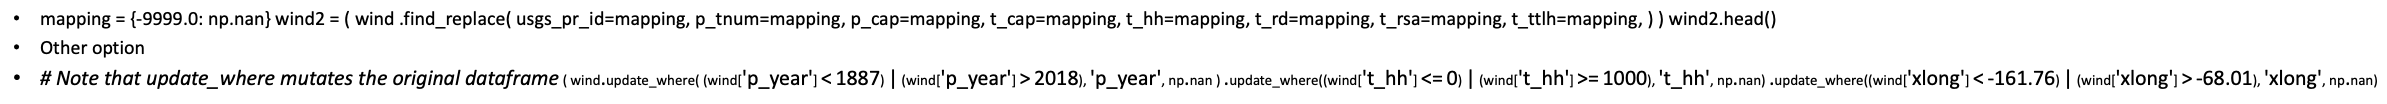

## Create new fields in adult_final and youth_final

Create new fields (XoY = X/Y) in youth_final and adult_final

In [ ]:
oldvariables = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

## Create new variables in adult_final final and youth_final

newvariables = ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

def createvariables(df):
    df['FEV1OFVC'] = df.SPPFEV1 / df.SPPFVC
    df['FEV1OFEV6']= df.SPPFEV1 / df.SPPFEV6
    df['PEFROFVC'] = df.SPPPEAK / df.SPPFVC
    df['PEFROFEV6']= df.SPPPEAK / df.SPPFEV6
    df['PEFROFEV1'] = df.SPPPEAK / df.SPPFEV1
    df['FEV3OFVC'] = df.SPPFEV3 / df.SPPFVC
    df['FEV6OFVC'] = df.SPPFEV6 / df.SPPFVC
    return

In [ ]:
def createvariables(df):
    df['FEV1OFVC'] = df.SPPFEV1 / df.SPPFVC
    df['FEV1OFEV6']= df.SPPFEV1 / df.SPPFEV6
    df['PEFROFVC'] = df.SPPPEAK / df.SPPFVC
    df['PEFROFEV6']= df.SPPPEAK / df.SPPFEV6
    df['PEFROFEV1'] = df.SPPPEAK / df.SPPFEV1
    df['FEV3OFVC'] = df.SPPFEV3 / df.SPPFVC
    df['FEV6OFVC'] = df.SPPFEV6 / df.SPPFVC
    return
    

createvariables(adult_final) then youth_final

In [ ]:
createvariables(adult_final)

In [ ]:
createvariables(youth_final)

In [ ]:
adult_final.PEFROFVC.hist(bins='auto', range=(0,5))

In [ ]:
youth_final.PEFROFVC.hist(bins='auto', range=(0,5))

In [ ]:
adult_final.FEV1OFVC.hist(bins='auto')

In [ ]:
youth_final.FEV1OFVC.hist(bins='auto')

In [ ]:
adult_final.FEV3OFVC.hist(bins='auto')

In [ ]:
youth_final.FEV3OFVC.hist(bins='auto')

In [ ]:
adult_final.describe()

In [ ]:
adult_final.BMPHT.std()

In [ ]:
adult_final.describe()

In [ ]:
print (adult_final.columns.values)

In [ ]:
print (youth_final.columns.values)

In [ ]:
youth_final.describe()

# Created other data bases to analyze

# adult m20overb m20overcma f18overb f18overcma

male 20 over. female 18 over; and cma (Caucasian-Mexican American) or b (black)
NOT NEED m20over = adult_final.query('HSAGEIR >=20 & HSSEX == 1’)
NOT NEED f18over = adult_final.query('HSAGEIR >=18 & HSSEX == 2’)
m20overb  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 2'))
m20overcma  = adult_final.query(('HSAGEIR >=20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overcma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overb = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 2 '))
m20overc  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 1'))
m20overma  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 3'))
f18overc = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 1 '))
f18overma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 3 '))

DMARETHN – 1 non-Hispanic white, 2 non-hispanic black, 3 Mexican American, 4 other


In [ ]:
m20overb  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 2'))
m20overcma  = adult_final.query(('HSAGEIR >=20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overcma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overb = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 2 '))
m20overc  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 1'))
m20overma  = adult_final.query(('HSAGEIR >= 20 & HSSEX == 1 & DMARETHN == 3'))
f18overc = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 1 '))
f18overma = adult_final.query(('HSAGEIR >=18 & HSSEX == 2 & DMARETHN == 3 '))

In [ ]:
f18overb.describe()

## Make dataframes mlt20 and flt18 for b, c, ma and cma combining adult final and youth final

male<20,female<18
mlt20b = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 2'))])
mlt20cma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3)'))])
flt18b = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 2'))])
flt18cma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3)'))])
mlt20c = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 1'))])
mlt20ma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 3'))])
flt18c = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 1'))])
flt18ma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 3'))])

DMARETHN – 1 non-Hispanic white, 2 non-hispanic black, 3 Mexican American, 4 other

In [ ]:
mlt20b = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 2'))])
mlt20cma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3)'))])
flt18b = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 2'))])
flt18cma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3)'))])
mlt20c = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 1'))])
mlt20ma = pd.concat([adult_final.query(('HSAGEIR < 20 & HSSEX == 1 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 3'))])
flt18c = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 1'))])
flt18ma = pd.concat([adult_final.query(('HSAGEIR < 18 & HSSEX == 2 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 3'))])

# Create data bases for all male/female cma, black for ratios

Groups for ratios
All male cma  mallcma = pd.concat([m20overcma, mlt20cma])
All male black  mallb = pd.concat([m20overb, mlt20b])
All female cma  fallcma = pd.concat([f18overcma, flt18cma])
All female black  fallb = pd.concat([f18overb, flt18b])
All male c  mallc = pd.concat([m20overc, mlt20c])
All male ma  mallma = pd.concat([m20overma, mlt20ma])
All female c  fallc = pd.concat([f18overc, flt18c])
All female ma  fallma = pd.concat([f18overma, flt18ma])

In [ ]:
mallcma = pd.concat([m20overcma, mlt20cma])
mallb = pd.concat([m20overb, mlt20b])
fallcma = pd.concat([f18overcma, flt18cma])
fallb = pd.concat([f18overb, flt18b])
mallc = pd.concat([m20overc, mlt20c])
mallma = pd.concat([m20overma, mlt20ma])
fallc = pd.concat([f18overc, flt18c])
fallma = pd.concat([f18overma, flt18ma])

## Check variable created

In [ ]:
flt18b.SPPFEV1.hist(bins='auto')

In [ ]:
flt18b.PEFROFVC.hist(bins='auto', range=(0,5))

In [ ]:
flt18b.HSAITMOR.hist(bins='auto', range=(0,300))

In [ ]:
flt18b.BMPHT.hist(bins='auto', range=(0,300))

## Frames to Analyze

framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]

In [ ]:
framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]

# framesto analyze names

m20overb.name = 'm20overb'
m20overcma.name = 'm20overcma'
f18overb.name = 'f18overb'
f18overcma.name = 'f18overcma'
mlt20b.name = 'mlt20b'
mlt20cma.name = 'mlt20cma'
flt18b.name = 'flt18b'
flt18cma.name = 'flt18cma'
mallcma.name = 'mallcma'
mallb.name = 'mallb'
fallcma.name = 'fallcma'
fallb.name = 'fallb'
m20overc.name = 'm20overc'
m20overma.name = 'm20ovecma'
f18overc.name = 'f18overc'
f18overma.name = 'f18overma'
mlt20c.name = 'mlt20c'
mlt20ma.name = 'mlt20ma'
flt18c.name = 'flt18c'
flt18ma.name = 'flt18ma'
mallma.name = 'mallma'
mallc.name = 'mallc'
fallma.name = 'fallma'
fallc.name = 'fallc'

In [ ]:
m20overb.name = 'm20overb'
m20overcma.name = 'm20overcma'
f18overb.name = 'f18overb'
f18overcma.name = 'f18overcma'
mlt20b.name = 'mlt20b'
mlt20cma.name = 'mlt20cma'
flt18b.name = 'flt18b'
flt18cma.name = 'flt18cma'
mallcma.name = 'mallcma'
mallb.name = 'mallb'
fallcma.name = 'fallcma'
fallb.name = 'fallb'
m20overc.name = 'm20overc'
m20overma.name = 'm20overma'
f18overc.name = 'f18overc'
f18overma.name = 'f18overma'
mlt20c.name = 'mlt20c'
mlt20ma.name = 'mlt20ma'
flt18c.name = 'flt18c'
flt18ma.name = 'flt18ma'
mallma.name = 'mallma'
mallc.name = 'mallc'
fallma.name = 'fallma'
fallc.name = 'fallc'

## Variables non-ratio

varsnonratio = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

In [ ]:
varsnonratio = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

In [ ]:
print (varsnonratio[0])

## Variables ratio

varsratio = ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

In [ ]:
varsratio= ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

## Now fit curves

using example in lmfit.github.io/lmfit-py/model.html

import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt

## from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

# Linear Regression Age  linear_regage (data, y_var)

In [ ]:
# age = 'HSAGEIR'/12 - or age in months/12
def linear_regage(data, y_var):
    X = data['HSAITMOR_exam']/12  # to convert to year do months at exam
    X = np.array(X).reshape(-1, 1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
 #   print(data.name, ", ",y_var, ", ",lr.intercept_, ", ", lr.coef_, ", ", lr.score(X, y), ", ", data.loc[:,y_var].std(), ", ", data.loc[:,y_var].count())
 # now returns values rather than print - intercept, slope, R2, std, count
    return lr.intercept_, lr.coef_, lr.score(X, y),  data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [ ]:
for x in varsratio:
    print (x)

## For all frames, for all ratios to analyze, do regression vs age & save in resultsratioand index dfnvarn

print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation')
for y in framestoanalyze:
Save results in dataframe resultsratio

In [ ]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratio = pd.DataFrame(columns = column_names)
resultsratio.name = 'resultsratio'
print (resultsratio)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dfnvarn, dataframe,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratio:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ',', y.name, ',', xx, ',', intercept, ',', slope, ',', r2, ',', std, ',',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratio = resultsratio.append(df2, ignore_index=True)    
print ('at end')
resultsratio.set_index('dfnvarn', inplace=True)
print (resultsratio)
    
    

# regression for non-ratios height_age_reg(data, y_var)

In [ ]:
def height_age_reg(data, y_var):
# convert agemonths to years
    X_age = data['HSAITMOR_exam']/12
    X_age = np.array(X_age).reshape(-1, 1)
    X_age = np.hstack((X_age, X_age**2))
    X_height = data['BMPHT']**2
    X_height = np.array(X_height).reshape(-1, 1)
    X = np.concatenate((X_age, X_height), axis=1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
 #   print(data.name, ", ",y_var, ", ",lr.intercept_, ",", lr.coef_, ",", lr.score(X, y), ",",  data.loc[:,y_var].std(), ",",  data.loc[:,y_var].count())
    return data.name, y_var, lr.intercept_, lr.coef_, lr.score(X, y), data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [ ]:
for x in varsnonratio:
    print (x)

# Create Resultsnonratio with all of regression results for all dataframes all nonratio variables

In [ ]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "b1", "b2", "b3", "r2", "std", "count"]
# print (column_names)
resultsnonratio = pd.DataFrame(columns = column_names)
resultsnonratio.name = 'resultsnonratio'
print (resultsnonratio)
print ('Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
print ('dfnvarn, dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsnonratio:
  #       print(y, " ", xx)
         reg = height_age_reg(y,xx)
         dbname, var, intercept, coef, r2, std, count = reg
         b1, b2, b3, = coef 
                  
         dfnvarn = y.name + xx
         print (dfnvarn, ',', dbname, ',', var, ',',intercept, ',',b1, ',',b2, ',',b3, ',',r2, ',',std, ',',count)
         #  Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count]  
            
         df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          
         resultsnonratio = resultsnonratio.append(df2, ignore_index=True)
print ('at end')
resultsnonratio.set_index('dfnvarn', inplace=True)
print (resultsnonratio)            

## ****** Now percent predicted - create variables for ratios first

First function to create PPratiovars for a dataframe, then create for all dataframes

In [ ]:
def createvarspp(df):
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPP'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PP']= df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6PP']= df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] 
                                       + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1PP'] = df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] 
                                        + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'FEV3OFVC'
    df['FEV3OFVCPP'] = df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPP'] = df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))

For all dataframes, create ppvar values (shows caveat but works)

In [ ]:
for y in framestoanalyze:
    createvarspp(y)

In [ ]:
def createvarsPred(df):
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
#    print (vn)
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6Pred']= (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6Pred']= (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1Pred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV3OFVC'
    df['FEV3OFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAGEIR / 12))


In [ ]:
for y in framestoanalyze:
    createvarsPred(y)

In [ ]:
print (m20overb.columns.values)

Check can refer to resultsratio value

In [ ]:
print(resultsratio)

In [ ]:
vn = 'm20overbFEV1OFVC'
print(resultsratio.loc[vn, 'intercept'] )

In [ ]:
print(resultsnonratio)

In [ ]:
vn = 'm20overbSPPFEV1'
print(resultsnonratio.loc[vn, 'intercept'] )

Now create PP Nonratio PP  FEV1PP, PEFRPP, FVCPP, FEV3PP, FEV6PP, MMEFPP, FEF75PP, EXPIRPP  from resultsnonratio

In [ ]:
resultsnonratio  # sometimes has not set dfnvarn as target

In [ ]:
resultsnonratio

In [ ]:

# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')

def createvarsnonratiopp(df):
    vn = df.name + 'SPPFEV1'
    print (vn)
    df['FEV1PP'] = df.SPPFEV1 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFVC'
    df['FVCPP'] =  df.SPPFVC /  (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPPEAK'
    df['PEFRPP'] = df.SPPPEAK / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEV3'
    df['FEV3PP'] = df.SPPFEV3 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEV6'
    df['FEV6PP'] = df.SPPFEV6 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPMMEF'
    df['MMEFPP'] = df.SPPMMEF / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEF75'
    df['FEF75PP'] = df.SPPFEF75 / (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPEXPIR'
    df['EXPIRPP'] = df.SPPEXPIR / (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )

Create predFVCmFEV6

In [ ]:

# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')

def createvarsnonratioPred(df):
    vn = df.name + 'SPPFEV1'
    df['FEV1Pred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFVC'
    df['FVCPred'] =  (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPPEAK'
    df['PEFRPred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEV3'
    df['FEV3Pred'] =  (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEV6'
    df['FEV6Pred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPMMEF'
    df['MMEFPred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPFEF75'
    df['FEF75Pred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'SPPEXPIR'
    df['EXPIRPred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )

In [ ]:

# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')

def createvarpredFVCmFEV6(df):
        vn = df.name + 'SPPFVC'
        vnb = df.name + 'SPPFEV6'
        df['predFVCmFEV6'] = (resultsnonratio.loc[vn, 'intercept'] 
                          + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                          + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                          + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT ) 
        - (resultsnonratio.loc[vnb, 'intercept'] 
                          + resultsnonratio.loc[vnb, 'b1'] * (df.HSAITMOR_exam / 12)  
                          + resultsnonratio.loc[vnb, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                          + resultsnonratio.loc[vnb, 'b3']* df.BMPHT * df.BMPHT )
    


In [ ]:
resultsnonratio.describe()

For all dataframes create varsnonratiopp and varsnonratioPred

In [ ]:
for y in framestoanalyze:
    print(y.name)
    createvarsnonratiopp(y)
    createvarsnonratioPred(y)
    

In [ ]:
for y in framestoanalyze:
 #   print(y.name)
    createvarpredFVCmFEV6(y)
    

In [ ]:
m20overb.FEV1PP.hist(bins='auto')

In [ ]:
m20overb.PEFRPP.hist(bins='auto')

In [ ]:
m20overb.MMEFPP.hist(bins='auto')

In [ ]:
m20overb.predFVCmFEV6.hist(bins='auto')

In [ ]:
m20overb.MMEFPP.describe()

In [ ]:
pd.set_option('display.max_columns', 999)

In [ ]:
m20overb[m20overb.MMEFPP > 20]

Has many values as 88888 for SPPTIME, and 8888.0 SPPFEF75 AND SPPFEV05, 88888.0 for SPPMMEF, SPPFEV3, SPPFEV05, SPPFEV6
  from NHANES doc, SPPPEAK 1596 with 8888
  SPPFEV05 1832 with 8888
  SPPFEV1 1596 with 8888
  SPPFEV3 1832 with 88888
  SPPFEV6 1832 with 88888
  SPPFVC 1596 with 88888
  SPPMMEF 1832 with 88888
  SPPEXPIR 1638 with 88
  so need replace those in adult and youth files

So when doing analysis need ignore values of 8888

In [ ]:
m20overb[m20overb.MMEFPP > 20]

Now create variables that depend on PP - PEFRPPOFVCPP, and PEFRPPOFEV1PP, 
then regression vs age in resultsppvars in form dfvartnam, bo, b1
then new value %pred
then 

create PEFRpp/FEV1pp and PEFRpp/FVCpp for all dataframes

In [ ]:
def createvariablespp(df):
    df['PEFRPPOFEV1PP'] = df.PEFRPP / df.FEV1PP
    df['PEFRPPOFVCPP']= df.PEFRPP/ df.FVCPP
    return

In [ ]:
for y in framestoanalyze:
    createvariablespp(y)

linear regression of PEFRpp/FEV1pp and PEFRpp/FVCpp vs age into resultsratiopp; for all dataframes

In [ ]:
varsratiopp= ['PEFRPPOFEV1PP', 'PEFRPPOFVCPP']

# First initialize resultsratiopp dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratiopp = pd.DataFrame(columns = column_names)
resultsratiopp.name = 'resultsratiopp'
print (resultsratiopp)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratiopp:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ',', y.name, ',', xx, ',', intercept, ',', slope, ',', r2, ',', std, ',',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratiopp = resultsratiopp.append(df2, ignore_index=True)    
print ('at end')
resultsratiopp.set_index('dfnvarn', inplace=True)
print (resultsratiopp)
    
    

In [ ]:
# First initialize resultsratiopp dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratiopp = pd.DataFrame(columns = column_names)
resultsratiopp.name = 'resultsratiopp'
print (resultsratiopp)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratiopp:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ',', y.name, ',', xx, ',', intercept, ',', slope, ',', r2, ',', std, ',',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratiopp = resultsratiopp.append(df2, ignore_index=True)    
print ('at end')
resultsratiopp.set_index('dfnvarn', inplace=True)
print (resultsratiopp)
    
    

In [ ]:
for y in framestoanalyze:
    createvariablespp(y)

In [ ]:
m20overc.FEV1PP.hist(bins='auto')

Createvarsppopp for PEFRPPOFVCPPPP and PEFRPPOFVCPPPP

In [ ]:
def createvarsppopp(df):
    vn = df.name + 'PEFRPPOFVCPP'
    df['PEFRPPOFVCPPPP'] = df.PEFRPPOFVCPP / (resultsratio.loc[vn, 'intercept'] 
                                              + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFRPPOFEV1PP'
    df['PEFRPPOFEV1PPPP'] = df.PEFRPPOFEV1PP / (resultsratio.loc[vn, 'intercept'] 
                                                + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    

In [ ]:
m20overc.FEV1OFVC.hist(bins='auto')

In [ ]:
for y in framestoanalyze:
    createvarsppopp

In [ ]:
m20overc.FEV1OFVCPP.hist(bins='auto')

In [ ]:
std = m20overc.FEV1OFVC.std()
mean = m20overc.FEV1OFVC.mean()
ratio = std / mean # m20overc.FEV1OFVC.std()/m20overc.FEV1OFVC.mean()
print (mean, ratio, ratio* 1.645, mean - (ratio*1.645))
print (.876 * mean)

says mean FEV1/FVC .788, lower limit if use std for all data .645

The std is smaller for %predicted than for actual value
so to get 5% lower limit can use %predicted - 1.645 * std

In [ ]:
std = m20overc.FEV1OFVCPP.std()
mean = m20overc.FEV1OFVCPP.mean()
ratio = std/mean # m20overc.FEV1OFVCPP.std()/m20overc.FEV1OFVCPP.mean()
print (mean, ratio, ratio*1.645, mean - (ratio*1.645))

says mean FEV1/FVC %pred is 100% and lower limit .876 of that
if use prior mean FEV1/FVC of .788, .876 of that is .69 which is higher than .645

Try saving variables to array

In [ ]:
print (m20overc.name)
print (varsratio[1])
dfvar = m20overc.name + varsratio[1]
print (dfvar)

In [ ]:
print (resultsratio)

new variable %pred ratios

data.loc['m20overbFEV1OFVC']

In [ ]:
def height_age_reg(data, y_var):
# convert agemonths to years
    X_age = data['HSAGEIR']/12
    X_age = np.array(X_age).reshape(-1, 1)
    X_age = np.hstack((X_age, X_age**2))
    X_height = data['BMPHT']**2
    X_height = np.array(X_height).reshape(-1, 1)
    X = np.concatenate((X_age, X_height), axis=1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
    print(data.name, ", ",y_var, ", ",lr.intercept_, ",", lr.coef_, ",", lr.score(X, y), ",",  data.loc[:,y_var].std(), ",",  data.loc[:,y_var].count())
    return data.name, y_var, lr.intercept_, lr.coef_, lr.score(X, y), data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [ ]:
    print(data.name, ", ",y_var, ", ",lr.intercept_, ",", lr.coef_, ",", lr.score(X, y), ",",  data.loc[:,y_var].std(), ",",  data.loc[:,y_var].count())
    return data.name, y_var, lr.intercept_, lr.coef_, lr.score(X, y), data.loc[:,y_var].std(), data.loc[:,y_var].count()
# First initialize PPvalues dataframe
column_names = ["dfnvarn","dfname", "var", "mean", "std", "count"]
# print (column_names)
PPvalues= pd.DataFrame(columns = column_names)
PPvalues.name = 'PPvalues'
print (PPvalues)
print ('dataframe ,  variable,        mean,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varspp:
 #       print(y, " ", xx)
         reg = height_age_reg(y,xx)
         dbname, var, intercept, coef, r2, std, count = reg
         b1, b2, b3, = coef
         print (dbname, ', ', var, ', ',intercept, ', ',b1, ', ',b2, ', ',b3, ', ',r2, ', ',std, ', ',count)
         #  Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count] 

         dfnvarn = y.name + xx   
            
         df2 = {'dfnvarn': [dfnvarn], 'dfname': y.name, 'var': xx, 'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          
         resultsnonratio = resultsnonratio.append(df2, ignore_index=True)

In [ ]:
height_age_reg(m20overb, 'SPPFEV1')

# Regression for all dataframes all nonratio variables & save resultsnonratio  - already did

# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "b1", "b2", "b3", "r2", "std", "count"]
# print (column_names)
resultsnonratio = pd.DataFrame(columns = column_names)
resultsnonratio.name = 'resultsnonratio'
print (resultsnonratio)
print ('Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
print ('dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsnonratio:
 #       print(y, " ", xx)
         reg = height_age_reg(y,xx)
         dbname, var, intercept, coef, r2, std, count = reg
         b1, b2, b3, = coef
         print (dbname, ', ', var, ', ',intercept, ', ',b1, ', ',b2, ', ',b3, ', ',r2, ', ',std, ', ',count)
         #  Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count] 

         dfnvarn = y.name + xx   
            
         df2 = {'dfnvarn': [dfnvarn], 'dfname': y.name, 'var': xx, 'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          
         resultsnonratio = resultsnonratio.append(df2, ignore_index=True)

## now need do the same using Hankinson equations
Hvarlistnonratio - FEV1, FVC, FEV6, MMEF, PEF
Hvarlistratio - FEV1OFEV6, FEV1OFVC
need first enter Hresults into hresultsratio names intercept, slope 
  H has same equation for youth and adults for ratios
and Hresults into hresultsnonratio with names intercept, b1, b2
Can read from excel or csv file - data = pd.read_csv("filename.csv"); then data.head() to look at first five lines
then createvarsratiopph and createvarsnonratiopph for each in hvarlistratio and hvarlistnonratio
then creatediffsppratio and creatediffsppnonratio for each in hvarlistratio and hvarlistnonratio
the show mean and std of each variable

In [ ]:
hvarlistnonratio = [ 'SPPFEV1', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF']

In [ ]:
hvarlistratio = ['SPPFEV1OFVC','SPPFEV1OFEV6']

## Create dataframes hresultsratio hresultsnonratio from the csv files

In [ ]:
import os

In [ ]:
os.getcwd()

In [ ]:
os.listdir(os.getcwd())

In [ ]:
hresultsratio = pd.read_csv("data/hankinson_ratio.csv")
hresultsratio.set_index('dfnvarn', inplace=True)
print (hresultsratio)

In [ ]:
hresultsratio.head()

In [ ]:
hresultsnonratio = pd.read_csv("data/hankinson_nonratio.csv")
hresultsnonratio.set_index('dfnvarn', inplace=True)
print (hresultsnonratio)

In [ ]:
hresultsnonratio.head()

The Hankinson ratio are 1/100 as big, to need multiply by 100 (need double check)

In [ ]:
def createvarsratiopph(df):
    vn = df.name + 'FEV1OFVC'
#    print (vn)
 #   print(hresultsratio.loc[vn, 'dfname'])
 #   print(hresultsratio.loc[vn, 'slope'])

 #   print(hresultsratio.loc[vn, 'intercept'])
    df['FEV1OFVCPPh'] = (df.FEV1OFVC / (hresultsratio.loc[vn, 'intercept'] \
                                       + hresultsratio.loc[vn, 'slope'] * (df.HSAITMOR/ 12)))*100
    print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PPh']= (df.FEV1OFEV6 / (hresultsratio.loc[vn, 'intercept'] \
                                       + hresultsratio.loc[vn, 'slope'] * (df.HSAITMOR / 12)))*100
    

In [ ]:
def createvarsratiollnPredh(df):
    vn = df.name + 'FEV1OFVC'
#    print (vn)
 #   print(hresultsratio.loc[vn, 'dfname'])
 #   print(hresultsratio.loc[vn, 'slope'])

 #   print(hresultsratio.loc[vn, 'intercept'])
    df['FEV1OFVCLLNPredh'] = (hresultsratio.loc[vn, 'llnintercept'] \
                                       + hresultsratio.loc[vn, 'slope'] * (df.HSAITMOR/ 12))*100
    print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6LLNPredh']= (hresultsratio.loc[vn, 'llnintercept'] \
                                       + hresultsratio.loc[vn, 'slope'] * (df.HSAITMOR / 12))*100
    

change HSAITMOR_exam to HSAITMOR

In [ ]:
def createvarsnonratiopph(df):
# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
    vn = df.name + 'FEV1'
    print (vn)
    df['FEV1PPh'] = df.SPPFEV1 / 1000/(hresultsnonratio.loc[vn, 'intercept']  
                                       + hresultsnonratio.loc[vn, 'b1']  * (df.HSAITMOR / 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                       + hresultsnonratio.loc[vn, 'b3'] * df.BMPHT * df.BMPHT )
    vn = df.name + 'FVC'
    df['FVCPPh'] = df.SPPFVC / 1000 /(hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR / 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                      + hresultsnonratio.loc[vn, 'b3']
                                      * df.BMPHT * df.BMPHT )
    vn = df.name + 'PEF'
    df['PEFPPh'] = df.SPPPEAK /1000/ (hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                      + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEV6'
    df['FEV6PPh'] = df.SPPFEV6 /1000/ (hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR/ 12)* (df.HSAITMOR/ 12) 
                                       + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'MMEF'
    df['MMEFPPh'] = df.SPPMMEF / 1000/(hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR/ 12)* (df.HSAITMOR/ 12) 
                                       + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )


In [ ]:
def createvarsnonratioPredh(df):
# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
    vn = df.name + 'FEV1'
    print (vn)
    df['FEV1Predh'] = 1000*(hresultsnonratio.loc[vn, 'intercept']  
                                       + hresultsnonratio.loc[vn, 'b1']  * (df.HSAITMOR / 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                       + hresultsnonratio.loc[vn, 'b3'] * df.BMPHT * df.BMPHT )
    vn = df.name + 'FVC'
    df['FVCPredh'] = 1000 *(hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR / 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                      + hresultsnonratio.loc[vn, 'b3']
                                      * df.BMPHT * df.BMPHT )
    vn = df.name + 'PEF'
    df['PEFPredh'] = 1000* (hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                      + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEV6'
    df['FEV6Predh'] = 1000* (hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR/ 12)* (df.HSAITMOR/ 12) 
                                       + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'MMEF'
    df['MMEFPredh'] = 1000*(hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR/ 12)* (df.HSAITMOR/ 12) 
                                       + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )


In [ ]:
def createvarsnonratiollnPredh(df):
# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
    vn = df.name + 'FEV1'
    print (vn)
    df['FEV1LLNPredh'] = 1000*(hresultsnonratio.loc[vn, 'intercept']  
                                       + hresultsnonratio.loc[vn, 'b1']  * (df.HSAITMOR / 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                       + hresultsnonratio.loc[vn, 'llnb3'] * df.BMPHT * df.BMPHT )
    vn = df.name + 'FVC'
    df['FVCLLNPredh'] = 1000*(hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR / 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                      + hresultsnonratio.loc[vn, 'llnb3']
                                      * df.BMPHT * df.BMPHT )
    vn = df.name + 'PEF'
    df['PEFLLNPredh'] = 1000*(hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                      + hresultsnonratio.loc[vn, 'llnb3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEV6'
    df['FEV6LLNPredh'] = 1000*(hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR/ 12)* (df.HSAITMOR/ 12) 
                                       + hresultsnonratio.loc[vn, 'llnb3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'MMEF'
    df['MMEFLLNPredh'] = 1000*(hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR/ 12)* (df.HSAITMOR/ 12) 
                                       + hresultsnonratio.loc[vn, 'llnb3']* df.BMPHT * df.BMPHT )


In [ ]:
def createvarpredFVCmFEV6h(df):
# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
    vn = df.name + 'FVC'
    vnb = df.name + 'FEV6'
    df['predFVCmFEV6h'] = (hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR / 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR / 12)* (df.HSAITMOR / 12) 
                                      + hresultsnonratio.loc[vn, 'b3'] * df.BMPHT * df.BMPHT ) 
    - (hresultsnonratio.loc[vnb, 'intercept'] 
                                      + hresultsnonratio.loc[vnb, 'b1'] * (df.HSAITMOR/ 12)  
                                      + hresultsnonratio.loc[vnb, 'b2'] * (df.HSAITMOR/ 12)* (df.HSAITMOR/ 12) 
                                      + hresultsnonratio.loc[vnb, 'b3']* df.BMPHT * df.BMPHT )


In [ ]:
hresultsratio.index

In [ ]:
hratioframestoanalyze = [m20overb,  m20overc, m20overma, f18overb,  f18overc, f18overma, 
                   mlt20b,  mlt20c, mlt20ma, flt18b, flt18c, flt18ma, 
                    mallb, mallc, mallma,  fallb, fallc, fallma]

In [ ]:
hnonratioframestoanalyze = [m20overb,  m20overc, m20overma, f18overb,  f18overc, f18overma, 
                   mlt20b,  mlt20c, mlt20ma, flt18b, flt18c, flt18ma ]

In [ ]:
hresultsnonratio.index

In [ ]:
for y in hratioframestoanalyze:
#    print (y.name)
    createvarsratiopph(y)
 #   createvarpredFVCmFEV6h(y) # can't do pred for all
    createvarsratiollnPredh(y)

In [ ]:
for y in hnonratioframestoanalyze:
#    print (y.name)
    createvarsnonratiopph(y)
    createvarpredFVCmFEV6h(y)
    createvarsnonratiollnh(y)
    createvarsnonratiollnPredh(y)

The predicted FVC should always be more than predicted FEV6 - which it is

In [ ]:
m20overb.predFVCmFEV6h.hist(bins='auto')

creatediffsppratio and creatediffsppnonratio 

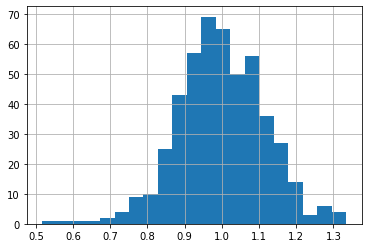

In [1208]:
m20overc.FEV6PPh.hist(bins='auto')

In [1209]:
m20overb.FEV1PPh.describe()

count    473.000000
mean       0.994674
std        0.146739
min        0.351812
25%        0.915250
50%        0.999995
75%        1.085851
max        1.502538
Name: FEV1PPh, dtype: float64

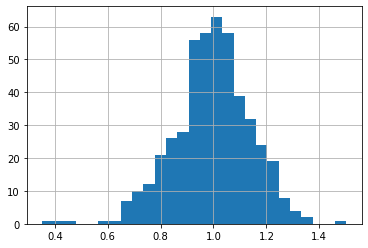

In [1210]:
m20overb.FEV1PPh.hist(bins='auto')

In [ ]:
m20overb.FEV1LLLPPh.hist(bins='auto')

There is one m20overb FEV1PPh of -.211 which should be removed
need find out which one this is and why
It has HSAITMOR_exam = 9999  m20overb.query('FEV1PPh < 0').HSAITMOR_exam
Need get rid of those records

In [ ]:
m20overb.query('FEV1PPh < .5').HSAITMOR

In [ ]:
m20overc.FEV6PPh.describe()

In [ ]:
m20overb.FEV6PPh.describe()

In [ ]:
m20overb.query('FEV6PPh < 0').HSAITMOR

m20overb FEV6 - has one -.33, which had HSAITMOR = 9999

In [ ]:
m20overma.FEV6PPh.describe()

In [ ]:
m20overb.FVCPPh.describe()

FVC m20overb FVCPPh min -.418

In [ ]:
m20overb.FVCPPh.hist(bins='auto')

should look at all the FVC values for m20overb and see if any are negative
or print the FVC and FVCPPh for all of those and see which is off (is a predicted negative)

In [ ]:
mlt20ma.FVCPPh.describe()

In [ ]:
m20overc.FEV1PP.hist(bins='auto')

FEV1PP on our data is not 1 - why is that

In [ ]:
m20overc.FEV1PPh.hist(bins='auto')

In [ ]:
m20overc.FEV1OFVCPPh.hist(bins='auto')

In [ ]:
def creatediffs(df):
    df['FEV1PPdiff'] = df.FEV1PP - df.FEV1PPh
    df['FVCPPdiff'] = df.FVCPP - df.FVCPPh
    df['PEFRPPdiff'] = df.PEFRPP - df.PEFPPh
    df['MMEFPPdiff'] = df.MMEFPP - df.MMEFPPh
    df['FEV6PPdiff'] = df.FEV6PP - df.FEV6PPh
    df['FEV1OFVCPPdiff'] = df.FEV1OFVCPP - df.FEV1OFVCPPh
    df['FEV1OFEV6PPdiff'] = df.FEV1OFEV6PP - df.FEV1OFEV6PPh 
    

In [ ]:
m20overc.loc[:,"PEFPPh"].mean()

Has FEV1PP, PEFPPh, but not PEFPP - it is PEFR

In [ ]:
m20overc.loc[:,"PEFRPP"].mean()

In [ ]:
for y in hnonratioframestoanalyze:
    print (y.name)
    creatediffs(y)

In [ ]:
m20overc.FEV1OFVCPPdiff.hist(bins='auto')

In [ ]:
m20overc.FEV1PPdiff.hist(bins='auto')

In [ ]:
m20overc.FEV1OFVCPP.hist(bins='auto')

In [ ]:
m20overc.FEV1OFVCPPh.hist(bins='auto')

In [ ]:
m20overc.FEV1OFVCPPdiff.hist(bins='auto')

In [ ]:
m20overc.FEV1OFEV6PPdiff.hist(bins='auto')

In [ ]:
mallma.FEF75PP.hist(bins='auto')

There is male with FEF75PP >5 (about 27)

In [ ]:
mallma.query('FEF75PP > 5')  #.HSAITMOR

There is a black with MMEFPP < 0 with age 963 months. 80 yo with MMEF 826, but MMEFPP -32.97 and FEF75 PP of - 0.28 - age is over 80 so should be excluded since over 80 years old which is 960; so delete those over 80 or HSAITMOR > 960
There is a black with FEF75 < 0 with HSAITMOR 937

In [ ]:
mallb.query('MMEFPP < 0')  #.HSAITMOR

In [ ]:
mallb.query('FEF75PP < 0')  #.HSAITMOR

In [ ]:
m20overc.loc[:,"FEV1OFEV6PPdiff"].mean()

In [ ]:
m20overc.loc[:,"FEV1OFEV6PPdiff"].std()

In [ ]:
m20overc.loc[:,"FEV1OFEV6PPdiff"].count()

In [ ]:
hdifflist =  ['FEV1PPdiff', 'FEV6PPdiff', 'FVCPPdiff','PEFRPPdiff','MMEFPPdiff','FEV1OFVCPPdiff', 'FEV1OFEV6PPdiff']

In [ ]:
print(hdifflist)

In [ ]:
m20overc.loc[:,"FEV1OFVC"].count()


for y in hdifflist:
  print(m20overc.name, ", ", y, ", ", df.loc[:,y].count())
  


Now want to get mean, stdev of the diffs for our caucasian and Hankinson caucasian (then black, then MA)
First need create combinued data set of all caucasian allc - mlt20c, m20overc, flt18c, f18overc (then black, MA)
Then get mean, stdev for each parameter - for each parameter print mean, stdev, n

create allc - mlt20c, m20overc, flt18c, f18overc
create allb - mlt20b, m20overb, flt18b, f18overb
create allma - mlt20ma, m20overma, flt18ma, f18overma
create all - allc, allb, allma


In [ ]:
allc = pd.concat([mlt20c, m20overc, flt18c, f18overc])
allb = pd.concat([mlt20b, m20overb, flt18b, f18overb])
allma = pd.concat([mlt20ma, m20overma, flt18ma, f18overma])
all = pd.concat([allc, allb, allma])

In [ ]:
allc.name = "allc"
allb.name = "allb"
allma.name = "allma"
all.name = "all"

In [ ]:
print (allc.name)

allb.describe  #- does allc only have 495????; why is same as allb, allma
need set dataframe first

In [ ]:
print("dataframe, variable, mean, STD, count")
ftoa = [allc, allb, allma, all]
for df in ftoa:
    print (df.name)
    for y in hdifflist:
        print(df.name, ", ", y, ", ", df.loc[:,y].mean(), ", ", df.loc[:,y].std(), ", ", df.loc[:,y].count())

  


want to compare MA %predicted of Caucasian and black %predicted to Caucasian
so create new variables for each parameter variablePPc for all groups (Caucasian should be 1.00)
then show mean, STD, count for each variable
expect MA to be close to Caucasian, Black to be 10% lower for non-ratio, and similar for ratio
for all groups, for all variables, create PPc
Then show the PPc

In [ ]:
PPclist = ['FEV10FVCPPc', 'FEV1OFEV6PPc', 'PEFROFVCPPc', 'PEFROFEV6PPc', 
           'PEFROFEV1PPc', 'FEV3OFVCPPc', 'FEV6OFVCPPc', 'FEV1PPc', 'FVCPPc',
           'PEFRPPc', 'FEV3PPc', 'FEV6PPc', 'MMEFPPc', 'FEF75PPc', 'EXPIRPPc']

In [ ]:
def createvarsppc(df, dfa):  #calculate variable c - the %predicted using caucasian predicteds 
 #   from results ratio vn which is the caucasian from results ratio caucasian
    vn = dfa.name + 'FEV1OFVC'
    df['FEV1OFVCPPc'] = df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = dfa.name + 'PEFROFVC'
    df['PEFROFVCPPc'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = dfa.name + 'FEV1OFEV6'
    df['FEV1OFEV6PPc']= df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPPc'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = dfa.name + 'PEFROFEV6'
    df['PEFROFEV6PPc']= df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] 
                                       + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = dfa.name + 'PEFROFEV1'
    df['PEFROFEV1PPc'] = df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] 
                                        + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = dfa.name + 'FEV3OFVC'
    df['FEV3OFVCPPc'] = df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = dfa.name + 'FEV6OFVC'
    df['FEV6OFVCPPc'] = df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    
    vn = dfa.name + 'SPPFEV1'
    df['FEV1PPc'] = df.SPPFEV1 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPFVC'
    df['FVCPPc'] =  df.SPPFVC /  (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPPEAK'
    df['PEFRPPc'] = df.SPPPEAK / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPFEV3'
    df['FEV3PPc'] = df.SPPFEV3 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPFEV6'
    df['FEV6PPc'] = df.SPPFEV6 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPMMEF'
    df['MMEFPPc'] = df.SPPMMEF / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPFEF75'
    df['FEF75PPc'] = df.SPPFEF75 / (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPEXPIR'
    df['EXPIRPPc'] = df.SPPEXPIR / (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )

In [ ]:
#framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
#                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
#                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]
dfa = m20overc
fta = [m20overb, m20overcma, m20overc, m20overma]
for y in fta:
    createvarsppc(y,dfa)
dfa = f18overc
fta = [f18overb, f18overcma, f18overc, f18overma]
for y in fta:
    createvarsppc(y, dfa)
dfa = mlt20c
fta = [mlt20b, mlt20cma, mlt20c, mlt20ma]
for y in fta:
    createvarsppc(y, dfa)
dfa = flt18c
fta = [flt18b, flt18cma, flt18c, flt18ma]
for y in fta:
    createvarsppc(y, dfa)          
          

Create PPvalues array which has mean and stdev of the percent predicted variables

In [ ]:
# create df PPvalues
column_names = ["dfnvarn","dfname", "var", "mean", "std", "count"]
# print (column_names)
PPvalues= pd.DataFrame(columns = column_names)
PPvalues.name = 'PPvalues'
print (PPvalues)
print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b, 
        mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma]
PPclist = ['FEV1OFVCPPc', 'FEV1OFEV6PPc', 'PEFROFVCPPc', 'PEFROFEV6PPc', 
           'PEFROFEV1PPc', 'FEV3OFVCPPc', 'FEV6OFVCPPc', 'FEV1PPc', 'FVCPPc',
           'PEFRPPc', 'FEV3PPc', 'FEV6PPc', 'MMEFPPc', 'FEF75PPc', 'EXPIRPPc']
for df in ftoa:
 #   print (df.name)
    for y in PPclist:
        print(df.name + y, ",", df.name, ", ", y, ", ", df.loc[:,y].mean(), ", ", df.loc[:,y].std(), ", ", df.loc[:,y].count())
        df2 = {    'dfnvarn': df.name + y, 'dfname': df.name, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count':df.loc[:,y].count()}
   #     df2 =  {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count',df.loc[:,y].count()}
  #      df2 = {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), std':df.loc[:,y].std(), 'count',df.loc[:,y].count()  }                         

        PPvalues = LLNvalues.append(df2, ignore_index=True)
  # now set index   
PPvalues.set_index('dfnvarn', inplace=True)

In [ ]:
PPvalues

Now print the mean, std, count for all the dataframes and PPc variables

In [ ]:
print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b, 
        mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma]
PPclist = ['FEV1OFVCPPc', 'FEV1OFEV6PPc', 'PEFROFVCPPc', 'PEFROFEV6PPc', 
           'PEFROFEV1PPc', 'FEV3OFVCPPc', 'FEV6OFVCPPc', 'FEV1PPc', 'FVCPPc',
           'PEFRPPc', 'FEV3PPc', 'FEV6PPc', 'MMEFPPc', 'FEF75PPc', 'EXPIRPPc']
for df in ftoa:
 #   print (df.name)
    for y in PPclist:
        print(df.name + y, ",", df.name, ", ", y, ", ", df.loc[:,y].mean(), ", ", df.loc[:,y].std(), ", ", df.loc[:,y].count())
#        df2 =         df2 = {'dfnvarn': [dfnvarn], 'dfname': y.name, 'var': xx, 
#                             'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          


Create PPvalues array which has mean and stdev of the percent predicted variables

Now compare our LLNX (meanX * (1 - 1.645 * STDPPX) to Hankinson LLN (from equation) for each variable and each group.  Have already created variables Xllnh from Hankinson equation.  Need create variables Xlln using our equation.  Create an array which contains the above values (similar to ratiovars)

First create our LLN variables which equal predicted mean * (1 - 1.645 * stdpp) for all datatframes for all variables  (Have already 
Then create new fields of the LLN diffs for Hankinson variables
Then comapre those LLN diffs
Then could also create array with Hansen LLN


In [ ]:
def createvarslln(df):  #calculate the lln for each variable
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPPlln'] = df.FEV1OFVC / df.FEV1OFVCPP * (1 - 1.645* ((llnvalues.loc[vn, 'mean']) 
                        
    vn = dfa.name + 'PEFROFVC'
    df['PEFROFVCPPc'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = dfa.name + 'FEV1OFEV6'
    df['FEV1OFEV6PPc']= df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPPc'] = df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = dfa.name + 'PEFROFEV6'
    df['PEFROFEV6PPc']= df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] 
                                       + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = dfa.name + 'PEFROFEV1'
    df['PEFROFEV1PPc'] = df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] 
                                        + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = dfa.name + 'FEV3OFVC'
    df['FEV3OFVCPPc'] = df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    vn = dfa.name + 'FEV6OFVC'
    df['FEV6OFVCPPc'] = df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.HSAITMOR_exam / 12))
    
    vn = dfa.name + 'SPPFEV1'
    df['FEV1PPc'] = df.SPPFEV1 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPFVC'
    df['FVCPPc'] =  df.SPPFVC /  (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPPEAK'
    df['PEFRPPc'] = df.SPPPEAK / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPFEV3'
    df['FEV3PPc'] = df.SPPFEV3 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPFEV6'
    df['FEV6PPc'] = df.SPPFEV6 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPMMEF'
    df['MMEFPPc'] = df.SPPMMEF / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPFEF75'
    df['FEF75PPc'] = df.SPPFEF75 / (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'SPPEXPIR'
    df['EXPIRPPc'] = df.SPPEXPIR / (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.HSAITMOR_exam / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.HSAITMOR_exam / 12)* (df.HSAITMOR_exam / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )

Create LLN diffs variables

In [ ]:
def createllndiffs(df):
    df['FEV1llndiff'] = df.FEV1lln - df.FEV1llnh
    df['FVCllndiff'] = df.FVClln - df.FVCllnh
    df['PEFRllndiff'] = df.PEFRlln - df.PEFllnh
    df['MMEFllndiff'] = df.MMEFlln - df.MMEFllnh
    df['FEV6llndiff'] = df.FEV6lln - df.FEV6llnh
    df['FEV1OFVCllndiff'] = df.FEV1OFVClln - df.FEV1OFVCllnh
    df['FEV1OFEV6llndiff'] = df.FEV1OFEV6lln - df.FEV1OFEV6llnh

In [ ]:
For y in hframestoanalyze
    createllndiffs(y)

In [ ]:
hdifflist =  ['FEV1PPdiff', 'FEV6PPdiff', 'FVCPPdiff','PEFRPPdiff','MMEFPPdiff','FEV1OFVCPPdiff', 'FEV1OFEV6PPdiff']

    print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b, 
        mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma]
PPclist = ['FEV1OFVCPPc', 'FEV1OFEV6PPc', 'PEFROFVCPPc', 'PEFROFEV6PPc', 
           'PEFROFEV1PPc', 'FEV3OFVCPPc', 'FEV6OFVCPPc', 'FEV1PPc', 'FVCPPc',
           'PEFRPPc', 'FEV3PPc', 'FEV6PPc', 'MMEFPPc', 'FEF75PPc', 'EXPIRPPc']
for df in ftoa:
 #   print (df.name)
    for y in PPclist:
        print(df.name + y, ",", df.name, ", ", y, ", ", df.loc[:,y].mean(), ", ", df.loc[:,y].std(), ", ", df.loc[:,y].count())
#        df2 =         df2 = {'dfnvarn': [dfnvarn], 'dfname': y.name, 'var': xx, 
#                             'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          


LLN = 

First create new variables LLNdiff = our percent predicted - Hankinson percent predicted

Then see what those are
Then could use the other reference LLN
Also could see what % are below LLN

Or could cycle through range of height, range of age then compare our LLN to Hankinson LLN
i.e. for each dataframe to analyze  for each variable in hdifflist, for height 

In [ ]:
mallc.plot.scatter('HSAITMOR', 'SPPFEV1')

In [ ]:
mallc.plot.scatter('HSAITMOR', 'FEV1Pred')

In [ ]:
mallc.plot.scatter('HSAITMOR', 'FEV1PP')

In [ ]:
mlt20c.plot.scatter('HSAITMOR', 'SPPFEV1')

In [ ]:
mlt20c.plot.scatter('HSAITMOR', 'FEV1LLNPred')

In [ ]:
m20overma.plot.scatter('HSAITMOR', 'SPPFEF75')

In [ ]:
m20overma.plot.scatter('HSAITMOR', 'SPPPEAK')

In [ ]:
mlt20c.plot.scatter('HSAITMOR', 'FEV1PP')

In [ ]:
mlt20c.plot.scatter('HSAITMOR', 'MMEFPP')

In [ ]:
fallc.plot.scatter('HSAITMOR', 'BMPHT')

In [ ]:
mallma.plot.scatter('HSAITMOR', 'FVCPP')

In [ ]:
fallc.plot.scatter('HSAITMOR', 'FEV1PP')

In [ ]:
fallc.plot.scatter('BMPHT', 'FVCPP')

In [ ]:
# create df PPvalues
column_names = ["dfnvarn","dfname", "var", "mean", "std", "count"]
# print (column_names)
PPvalues= pd.DataFrame(columns = column_names)
PPvalues.name = 'PPvalues'
print (PPvalues)
print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b, 
        mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma]
PPclist = ['FEV1OFVCPPc', 'FEV1OFEV6PPc', 'PEFROFVCPPc', 'PEFROFEV6PPc', 
           'PEFROFEV1PPc', 'FEV3OFVCPPc', 'FEV6OFVCPPc', 'FEV1PPc', 'FVCPPc',
           'PEFRPPc', 'FEV3PPc', 'FEV6PPc', 'MMEFPPc', 'FEF75PPc', 'EXPIRPPc']
for df in ftoa:
 #   print (df.name)
    for y in PPclist:
        print(df.name + y, ",", df.name, ", ", y, ", ", df.loc[:,y].mean(), ", ", df.loc[:,y].std(), ", ", df.loc[:,y].count())
        df2 = {    'dfnvarn': df.name + y, 'dfname': df.name, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count':df.loc[:,y].count()}
   #     df2 =  {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count',df.loc[:,y].count()}
  #      df2 = {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), std':df.loc[:,y].std(), 'count',df.loc[:,y].count()  }                         

        PPvalues = LLNvalues.append(df2, ignore_index=True)
  # now set index   
PPvalues.set_index('dfnvarn', inplace=True)

Now create pplln array

In [ ]:
from scipy import stats

# now plot y actual value (e.g. of PEFR/FVC) vs predicted PEFR/FVC
first need new value PEFROFVCPRED = the regression for predicted
  and PEFROFVCPP - %predicted of PEF
then do linear regression of x = PEFROFVCPRED and y = PEFROFVCROFVC
do scatter plot of X,y to see if 
do histogram of PEFROFVC
do linear regression and scatter plot of PEFROFVCPP (y) versus age to see if the SDev varies by age
need see if normal distribution of 

Also have new variables PEFRPP/FVCPP - or PEFRPP-FVCPP
  then see if one or other has normal distribution and what is variance
  ratio should be centered around 1; and difference around 0
  I have been using PEFRPP-FVCPP >30 as indicator, but ratio may be better (e.g. if more than 1.3,

do plot of actual FEV1 vs predicted FEV1 ( x vs y)
to get lower limit, need standard deviation - first see if normal distribution
  then fit to gaussian and sdev from that
  
  need check whether same sdev for each age; whether same for each height, for each height**2, for each predicted FEV1
    by categories


We're trying to replicate and update Hankinson

We're trying to replicate and update Hankinson

# Now need determine LLN - ?used std

Determine lower limit of normal
  can do this if get starndard deviation for each variable
Assuming normal distribution get standard deviation for each variable
Could create variable as %predicted, then do normal distribution of the %predicteds
Would want to check if the standard deviation varied by age ?height
Alternatively is there a way to get lower 5%
